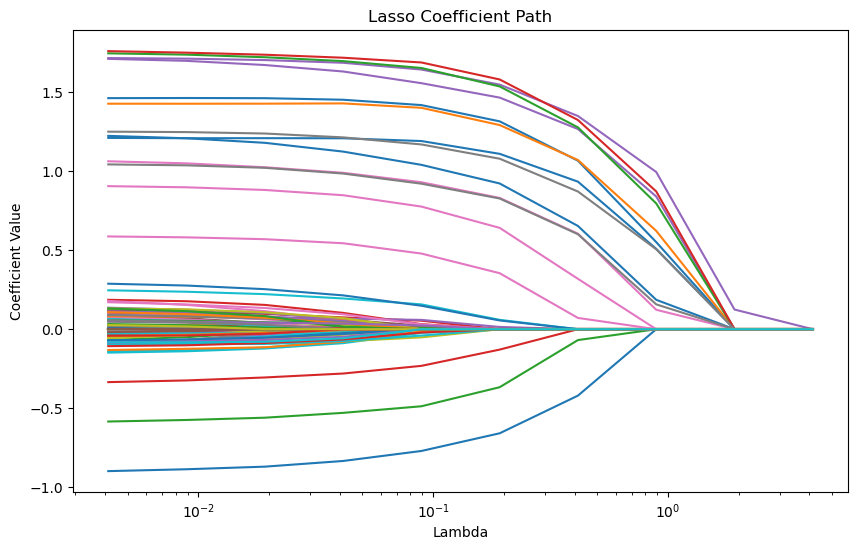

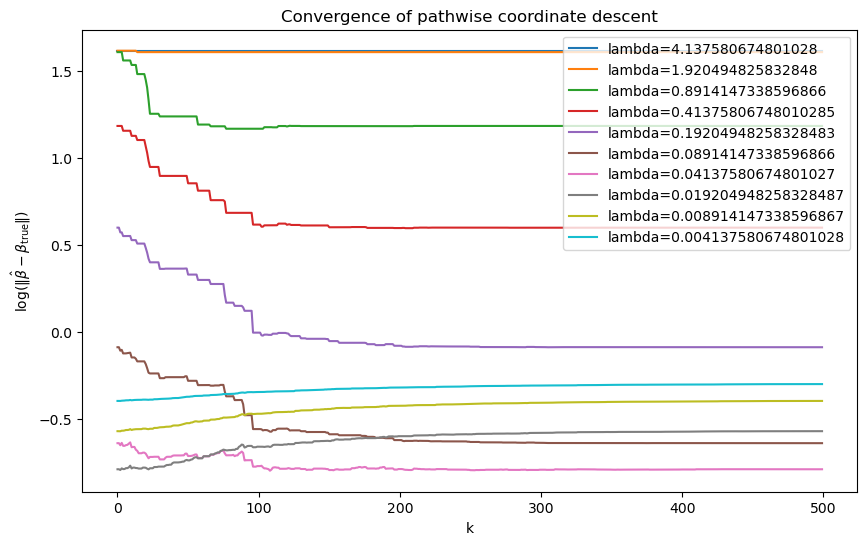

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def soft_thresholding(x, lambd_):
    return np.sign(x) * np.maximum(np.abs(x) - lambd_, 0)

def pathwise_coordinate_descent(X, y, lambdas, tol=1e-6, max_iter=500):
    n, p = X.shape
    beta_path = np.zeros((p, len(lambdas)))  # Store coefficients for each lambda
    beta = np.zeros(p)  # Initialize coefficients (start with zeros for the first lambda)
    error_mat=[]
    for l, lambd in enumerate(lambdas):
        error = []
        z=int(max_iter/p)
        for iteration in range(z):
            for j in range(p):
                r = y - X @ beta + X[:, j] * beta[j]
                beta[j] = soft_thresholding(X[:, j].T @ r / (X[:, j].T @ X[:, j]), lambd)
                error.append(np.linalg.norm(beta-beta_true))
        log_error = np.log(error) 
        error_mat.append(log_error)
        beta_path[:, l] = beta 
    return beta_path, error_mat
def compute_lambda_max(X, y):
    n = X.shape[0]  
    lambda_max = 2*np.max(np.abs(X.T @ y)) / n
    return lambda_max

np.random.seed(0)
n = 300
p = 100
z=20
X=np.random.normal(0, 1, (n, p))
beta_true = np.concatenate((np.zeros(p - z), np.random.normal(1, 1, z)))
beta_true = np.random.permutation(beta_true)
e=np.random.normal(0, 1, n)
y =X @ beta_true + e
lambda_max = compute_lambda_max(X, y)
lambdas = np.logspace(np.log10(lambda_max), np.log10(0.001 * lambda_max), 10)
# Compute the coefficient paths
beta_path,error_mat= pathwise_coordinate_descent(X, y, lambdas)

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(beta_path.shape[0]):
    plt.plot(lambdas, beta_path[i, :],label=f'feature{i+1}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficient Path')
plt.show()
plt.figure(figsize=(10, 6))
for i in range(len(lambdas)):
    print()
    plt.plot(np.arange(500),error_mat[i],label=f'lambda={lambdas[i]}')
plt.xlabel('k')
plt.ylabel(r'$\log(\|\hat{\beta} - \beta_{\text{true}}\|)$')
plt.legend(loc='upper right')
plt.title('Convergence of pathwise coordinate descent')
plt.show()


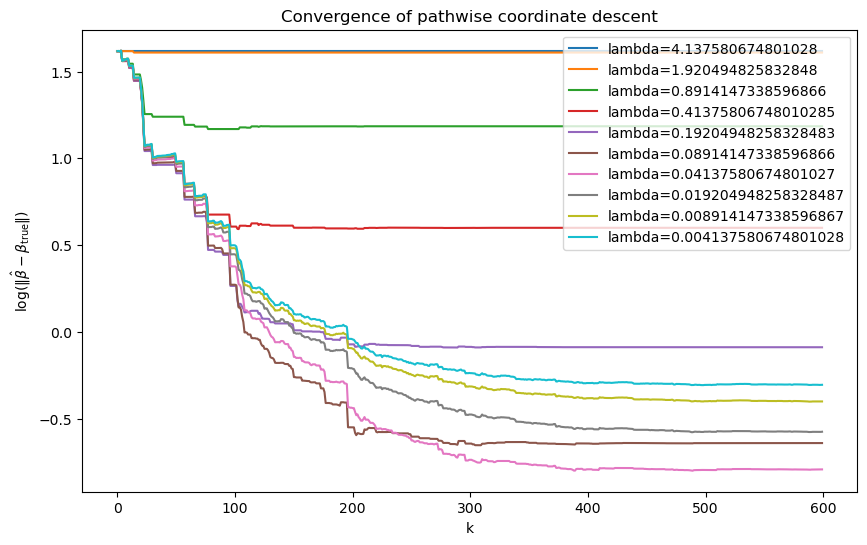

In [22]:
def pathwise_coordinate_descent2(X, y, lambdas, tol=1e-6, max_iter=600):
    n, p = X.shape
    beta_path = np.zeros((p, len(lambdas)))  # Store coefficients for each lambda
    beta = np.zeros(p)  # Initialize coefficients (start with zeros for the first lambda)
    error_mat=[]
    for l, lambd in enumerate(lambdas):
        beta = np.zeros(p)
        error = []
        z=int(max_iter/p)
        for iteration in range(z):
            for j in range(p):
                r = y - X @ beta + X[:, j] * beta[j]
                beta[j] = soft_thresholding(X[:, j].T @ r / (X[:, j].T @ X[:, j]), lambd)
                error.append(np.linalg.norm(beta-beta_true))
        log_error = np.log(error) 
        error_mat.append(log_error)
        beta_path[:, l] = beta 
    return beta_path, error_mat
beta_path,error_mat= pathwise_coordinate_descent2(X, y, lambdas)
plt.figure(figsize=(10, 6))
for i in range(len(lambdas)):
    print()
    plt.plot(np.arange(600),error_mat[i],label=f'lambda={lambdas[i]}')
plt.xlabel('k')
plt.ylabel(r'$\log(\|\hat{\beta} - \beta_{\text{true}}\|)$')
plt.legend(loc='upper right')
plt.title('Convergence of pathwise coordinate descent')
plt.show()
